MLCOE TASK 1
data = crop_yeild.csv

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defining the dataset

In [2]:
dataset = pd.read_csv('data/crop_yield.csv')

Checking the dataset's Head, column info and overview

In [3]:
dataset.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [5]:
dataset["Crop"].unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [6]:
dataset.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [7]:
nulls_values = dataset.isnull().sum()

print(f"There are {nulls_values.sum()} missing values in the dataset")

There are 0 missing values in the dataset


Might have to drop the year 2020 when training the model

In [8]:
dataset["Season"].value_counts()

Season
Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: count, dtype: int64

In [9]:
dataset["State"].value_counts()

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Uttarakhand           764
Odisha                760
Assam                 731
Nagaland              689
Puducherry            670
Meghalaya             649
Haryana               631
Jammu and Kashmir     631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Telangana             397
Punjab                397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

In [10]:
dataset["Crop_Year"].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [11]:
num_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

In [12]:
# dataset[num_cols].hist(bins=15, figsize=(10, 8), layout=(2, 3))

Finding Correlation between different features

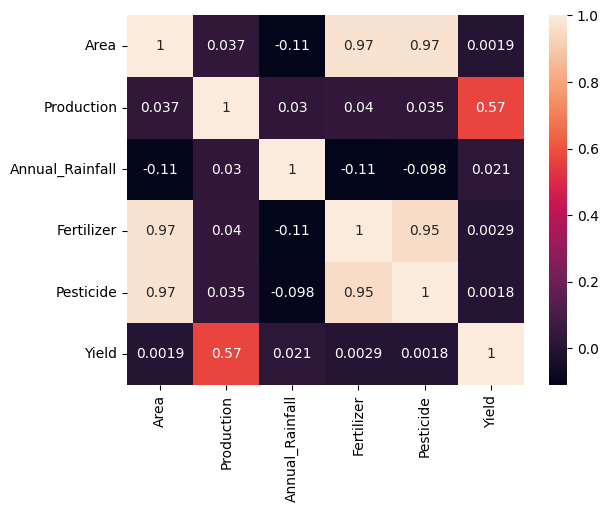

In [13]:
correlation_matrix = dataset[num_cols].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

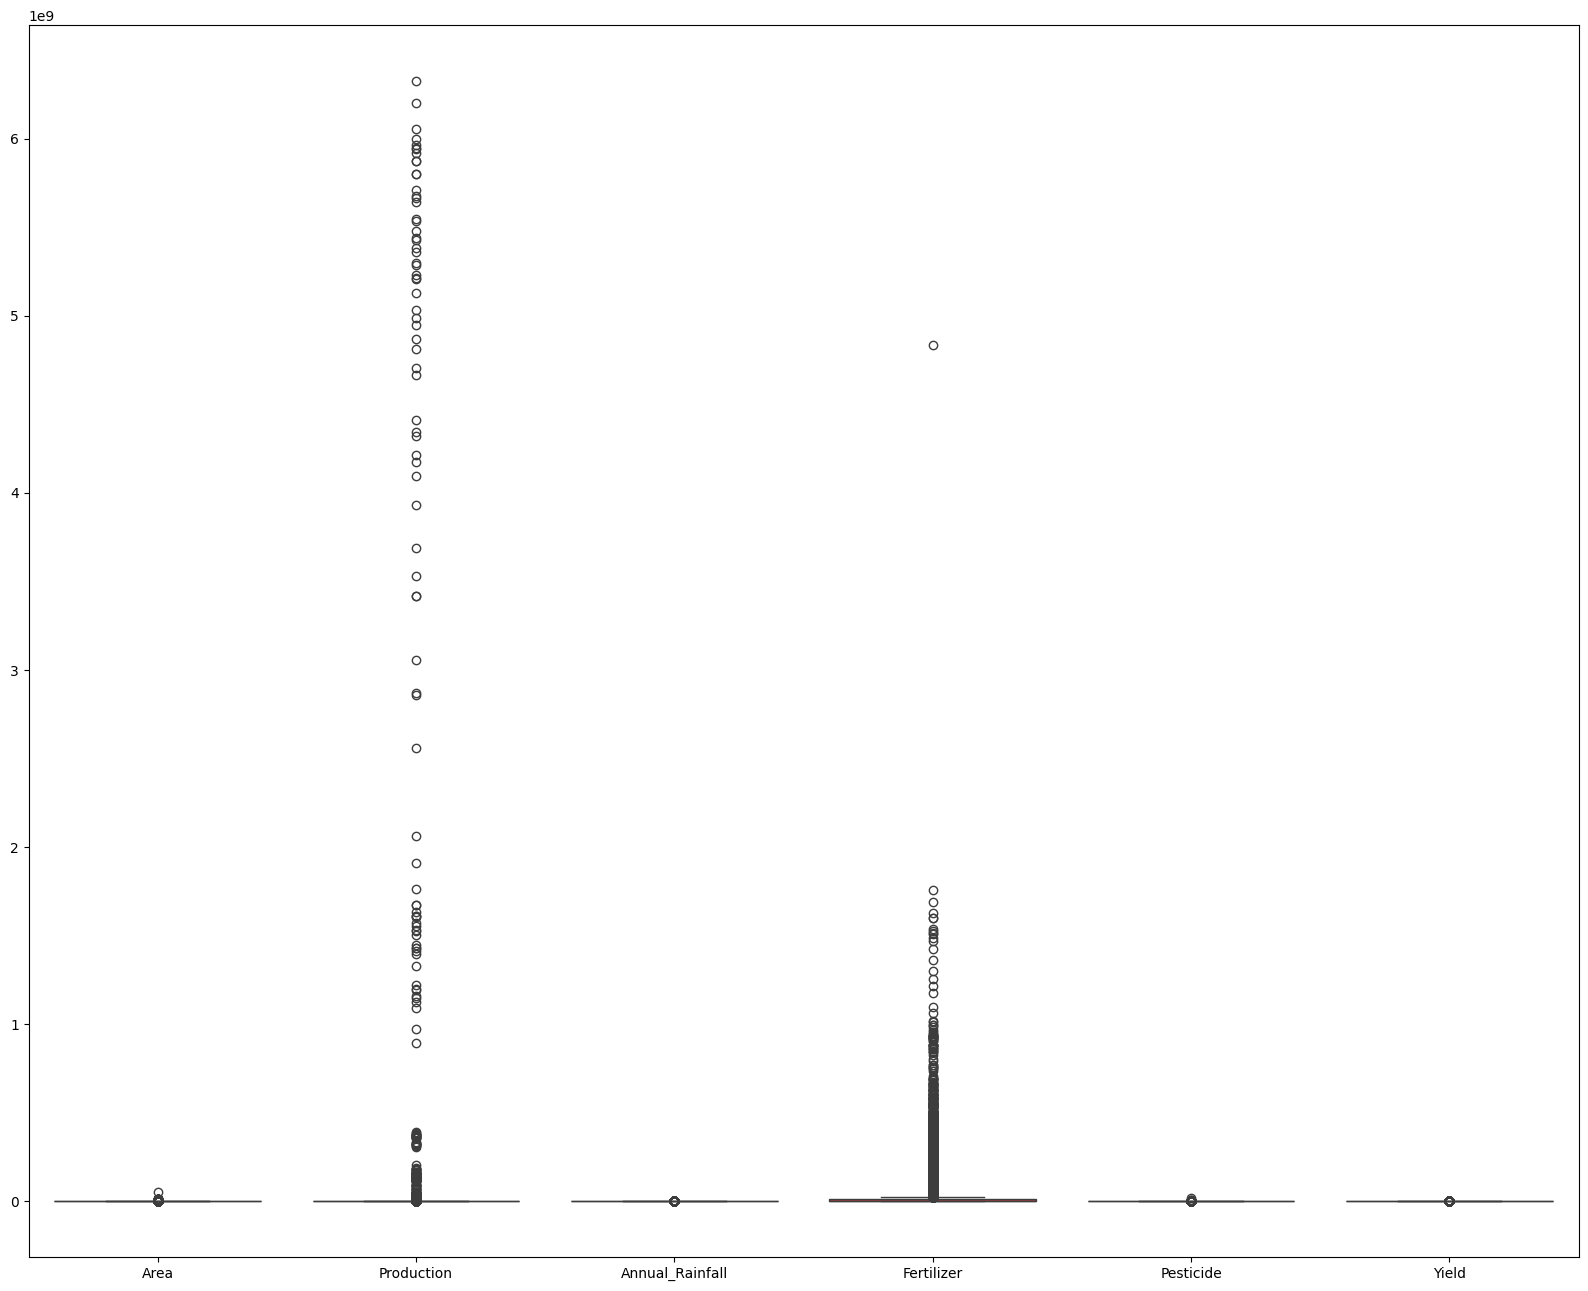

In [14]:
plt.figure(figsize=(20, 16))
sns.boxplot(data=dataset[num_cols])
plt.show()

Checking the trends 

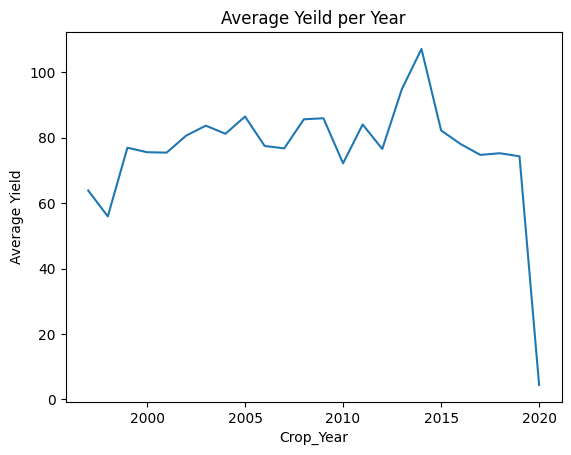

In [15]:
dataset.groupby('Crop_Year')['Yield'].mean().plot(kind='line')
plt.ylabel('Average Yield')
plt.title('Average Yeild per Year')
plt.show()

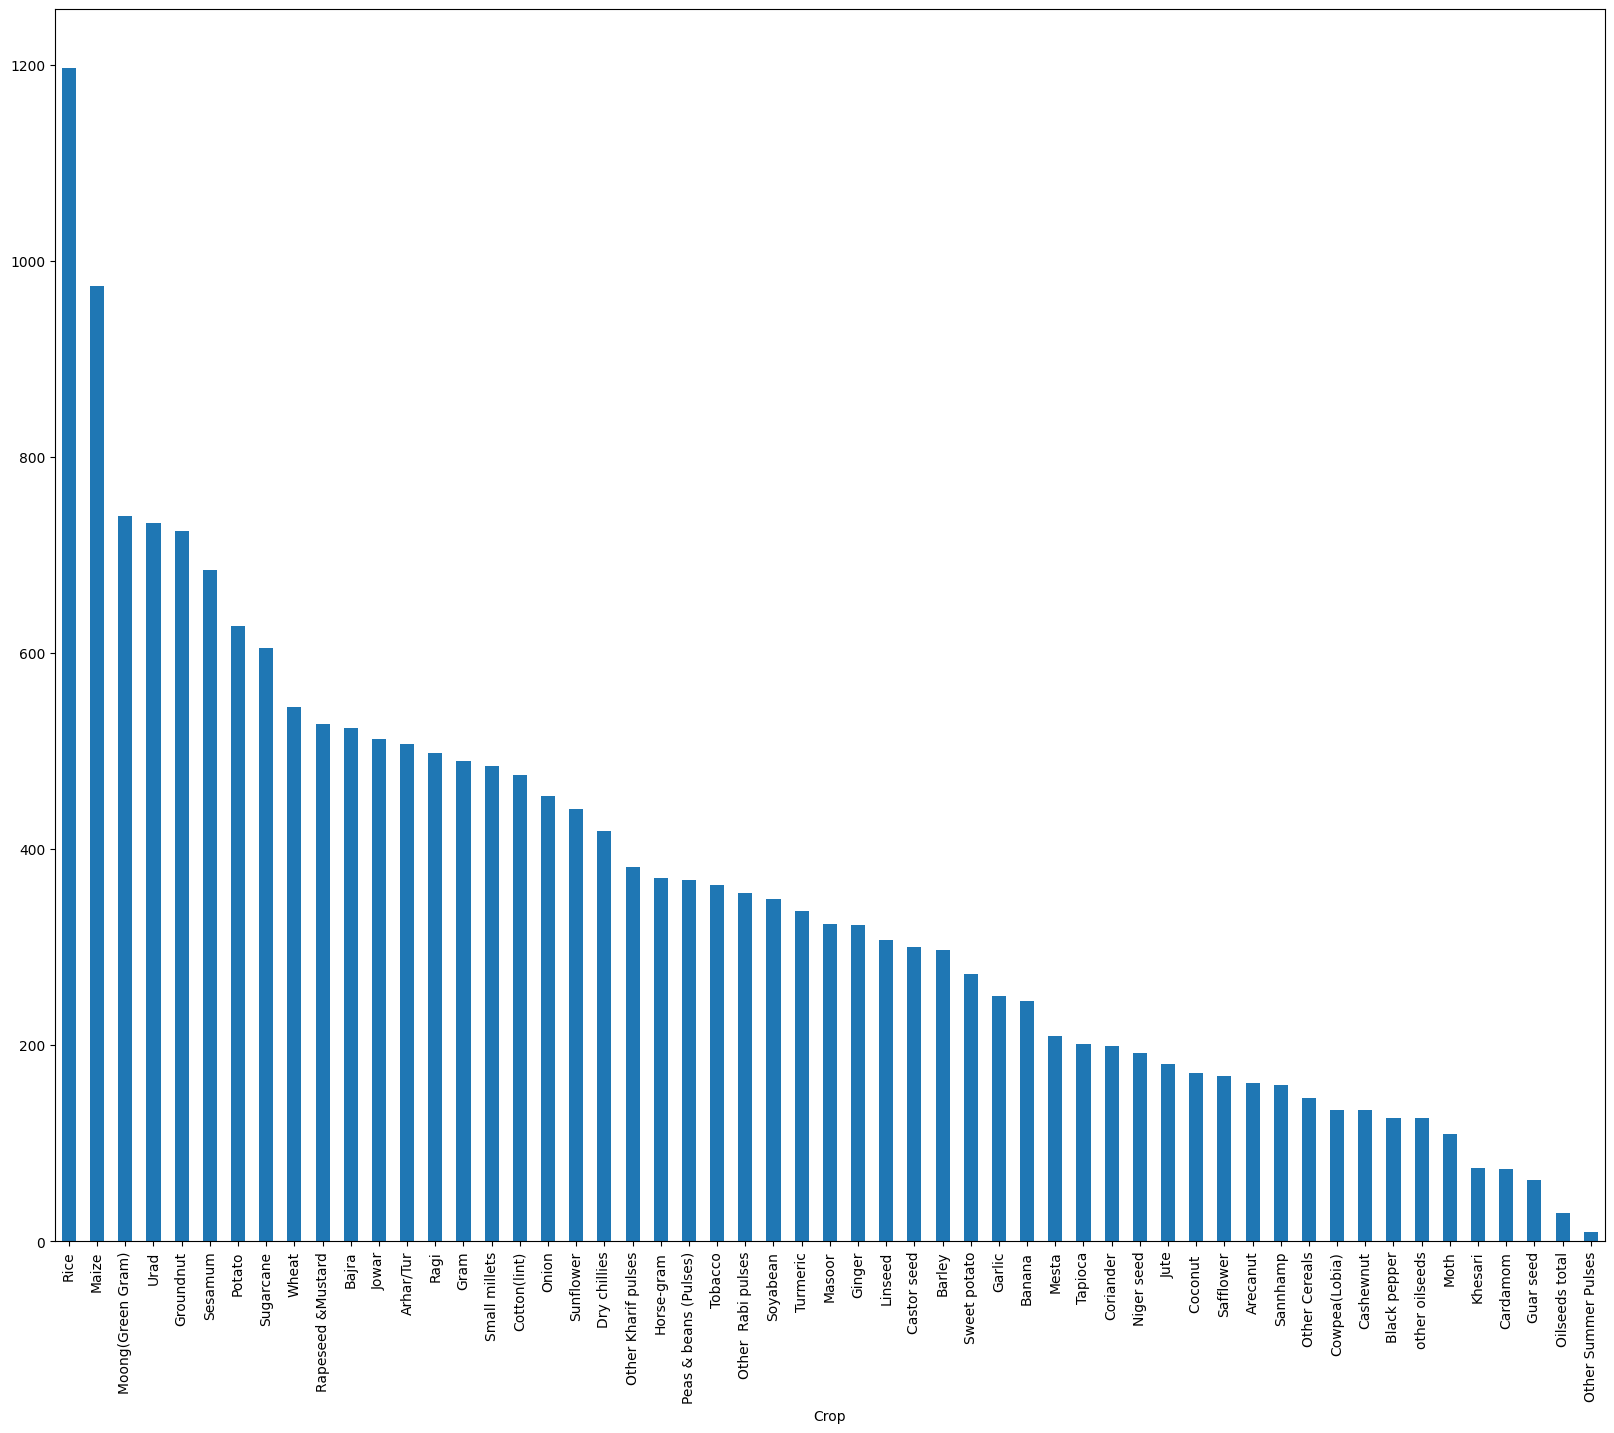

In [16]:
crop_frequency = dataset['Crop'].value_counts()
plt.figure(figsize=(20, 16))
crop_frequency.plot(kind='bar')
plt.show()

In [17]:
dataset["Crop_Year"].value_counts()

Crop_Year
2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: count, dtype: int64

Dropping Rows with Year=2020

In [18]:
dataset_new = dataset.drop(dataset[dataset["Crop_Year"]== 2020].index)


In [19]:
dataset_new["Crop_Year"].value_counts()

Crop_Year
2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
Name: count, dtype: int64

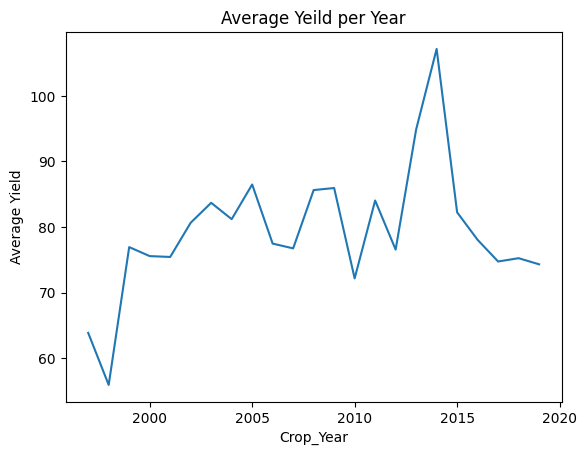

In [20]:
dataset_new.groupby('Crop_Year')['Yield'].mean().plot(kind='line')
plt.ylabel('Average Yield')
plt.title('Average Yeild per Year')
plt.show()

<Axes: xlabel='Crop_Year'>

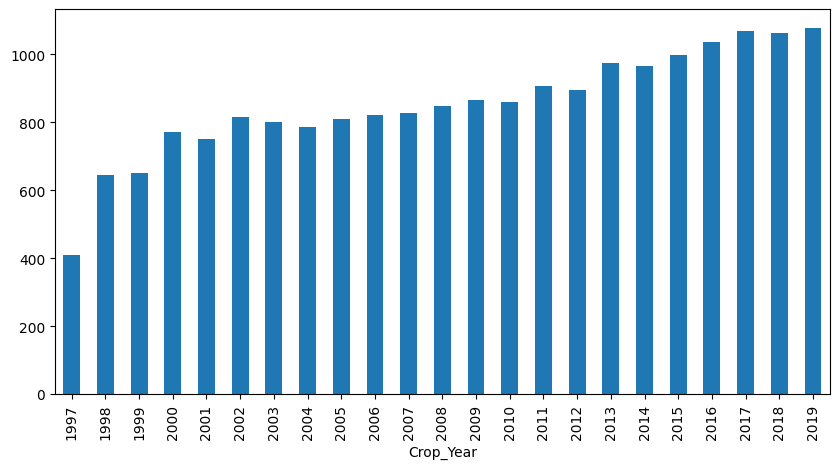

In [21]:
dataset_new["Yield"].groupby(dataset["Crop_Year"]).count().plot(kind="bar", figsize=(10, 5))

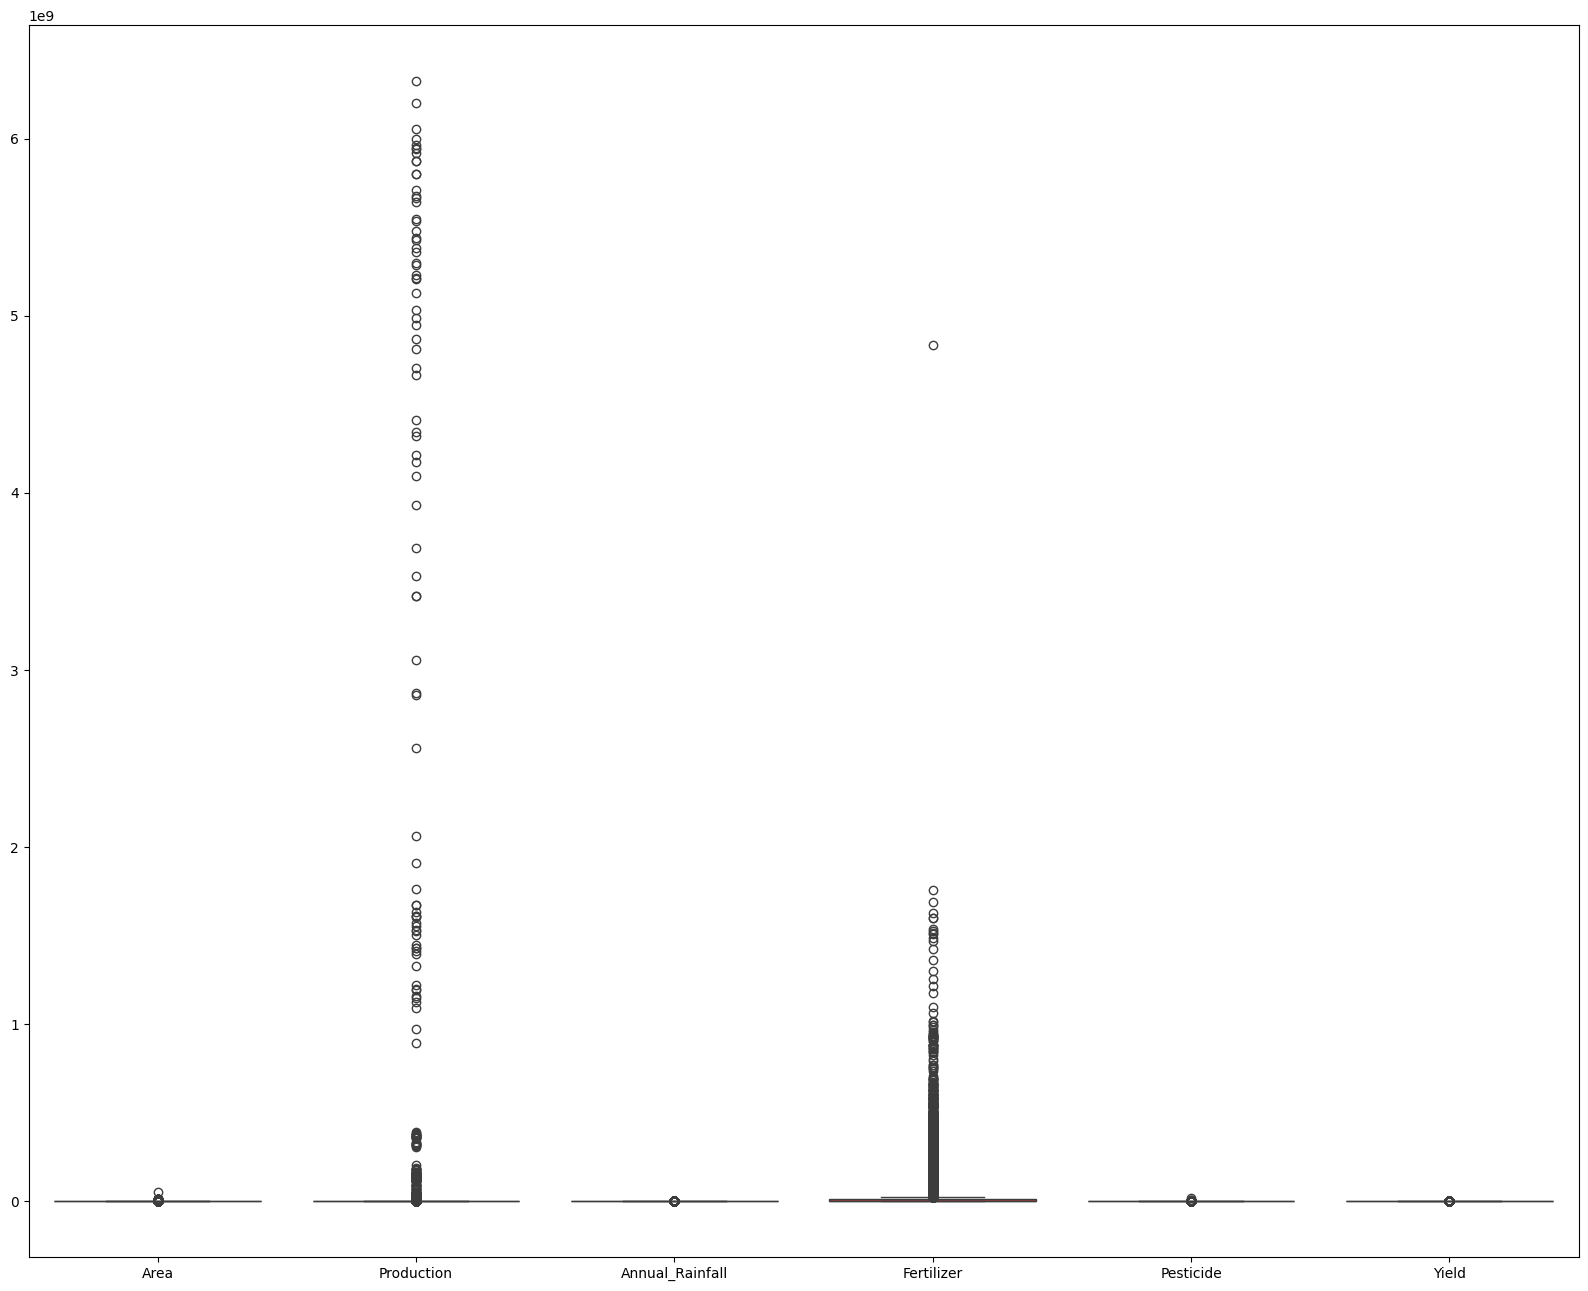

In [22]:
plt.figure(figsize=(20, 16))
sns.boxplot(data=dataset_new[num_cols])
plt.show()